# **Customer segmentation with clustering**

Understanding and serving customers are two of the retail industry's most important strategic marketing objectives. Knowing the customer allows businesses to be more customer-centric with improvements to metrics such as marketing efficiency, enhanced product development, increased customer satisfaction, better customer retention, price optimisation, and strategic resource allocation.

Customer segmentation allows a business to group customers based on demographics (e.g. age, gender, education, occupation, marital status, family size), geographics (e.g. country, transportation, preferred language), psychographics (e.g. lifestyle, values, personality, attitudes), behaviour (e.g. purchase history, brand loyalty, response to marketing activities), technographic (e.g. device type, browser type, original source), and needs (e.g. product features, service needs, delivery method).

<br></br>

## **Business context**
e-commerce data set from a real-world organisation is made available to perform customer segmentation with clustering models to improve marketing efforts (SAS, 2024). It is a transnational data set with customers from five continents (Oceania, North America, Europe, Africa, and Asia) and 47 countries.

The data set contains 951,668 rows, each representing a product a customer ordered. The data set contains details about the customer (e.g. location, product type, loyalty member) and order (e.g. days to delivery, delivery date, order date, cost, quantity ordered, profit) based on orders between 1 January 2012 and 30 December 2016.

As each customer is unique, it is critical to identify and/or create new features for customer segmentation to inform marketing efforts. The data set has 20 features you can choose from:
- **Quantity:** The quantity the customer orders (e.g. 1, 2, 3).
- **City:** Name of the customer's residence (e.g. Leinster, Berowra, Northbridge).
- **Continent:** Name of the continent where the customer resides (Oceania, North America).
- **Postal code:** Where the customer resides (e.g. 6437, 2081, 2063).   
State province: State or province where the customer resides (e.g. Western Australia, Quebec, New South Wales).
- **Order date:** The date the order was placed (e.g. 1 January 2012, 20 June 2014).
- **Delivery date:** The date the order was delivered (e.g. 12 April 2014, 19 November 2016).
- **Total revenue:** Total revenue based on ordered items in USD (e.g. 123.80, 85.10).
- **Unit cost:** Cost per unit ordered in USD (e.g. 9.10, 56.90).
- **Discount:** Percentage or normal total retail price (e.g. 50%, 30%).
- **Order type label:** Method in which the order was placed (e.g. internet sale, retail sale).
- **Customer country label:** The country where the customer resides (e.g. Australia, Canada, Switzerland).
- **Customer birthdate:** The date the customer was born (e.g. 8 May 1978, 18 December 1987).
- **Customer group:** Loyalty member group (e.g. internet/catalogue customers, Orion club gold members).
- **Customer type:** Loyalty member level (e.g. internet/catalogue customers, Orion club gold members high activity).
- **Order ID:** Unique order identifier (e.g. 1230000033).
- **Profit:** Total profit is calculated: $Total\:profit=Total\:revenue-(Unit\:cost\times Quantity)$.
- **Days to delivery:** The number of days for delivery is calculated: $Delivery\:days=Delivery\:date-Order\:date$ (e.g. 6, 3, 2).
- **Loyalty number:** Loyal customer (99) versus non-loyal customer (0).
- **Customer ID:** A unique identifier for the customer (e.g. 8818, 47793).

Since we have a transnational data set, which implies customers from different continents, several metrics are important when performing customer segmentation for target marketing. From a marketing perspective, the following five metrics help to understand the nuance of the customer base, buying behaviour, preferences, and value to the business.
- **Frequency** indicates how often a customer purchases over a given period of time. A high frequency indicates a loyal customer, a high level of satisfaction, trust or brand loyalty, and/or effective marketing efforts. Frequency based on purchases guides a business in the effectiveness of target marketing campaigns and how to target less active customers.
- **Recency** measures how recently a customer made a purchase or placed an order. It helps predict customer churn (turnover) and engagement. A customer is a business’s most valuable asset, so securing customer retention is essential. As a result, recent customer activity can indicate their overall satisfaction and engagement.
- **Customer lifetime value (CLV)** indicates the average or total value a customer contributes to a business over the course of their relationship. In other words, CLV is a metric of the total income a business can expect to generate from a customer as long as said customer remains a loyal client. CLV helps to prioritise marketing efforts and resources as it focuses on customers who are expected to bring the most value over time. Therefore, retaining high-value customers.
- The **average unit cost** indicates if the customer prefers low cost or high cost items. This is related to the profitability of purchases. Customers buying products with a higher average unit cost price should be targeted differently. Customer segmentation assists in identifying these customers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://github.com/FourthRevGitHub/CAM_DS_Public-Data-Sets/raw/main/Course%201/Week%206/CUSTOMERS_CLEAN.zip')

# Check Data Quality & Preprocess

In [ ]:
print(data.head(), '\n')
print("data shape:", data.shape, '\n')
print(data.info(), '\n')

#check if there are any duplicate entries, and remove. It is not likely that the duplicates here are correct
#there may not be 2 orders sharing all attributes including Order ID.
print("no of duplicate entries:", data.duplicated().sum())
df=data.drop_duplicates()
print("data types", df.dtypes)
print("data shape after removing duplicates", df.shape)


   Quantity         City      Continent Postal_Code     State_Province  \
0         3     Leinster        Oceania        6437  Western Australia   
1         2      Berowra        Oceania        2081    New South Wales   
2         2      Berowra        Oceania        2081    New South Wales   
3         1  Northbridge        Oceania        2063    New South Wales   
4         1     Montréal  North America         NaN             Quebec   

  Order_Date Delivery_Date Total Revenue Unit Cost Discount OrderTypeLabel  \
0  01JAN2012     07JAN2012       $28.50     $9.10         .  Internet Sale   
1  01JAN2012     04JAN2012      $113.40    $56.90         .  Internet Sale   
2  01JAN2012     04JAN2012       $41.00    $18.50         .  Internet Sale   
3  01JAN2012     03JAN2012       $35.20    $29.60         .  Internet Sale   
4  01JAN2012     04JAN2012       $24.70    $23.60         .  Internet Sale   

  CustomerCountryLabel Customer_BirthDate              Customer_Group  \
0            

It is not likely that the duplicates here are correct - there may not be 2 orders sharing all attributes including Order ID. Therefore duplicates were removed in this case.

#Feature Engineering

In [ ]:
#Convert Total Revenue and Unit Cost columns to string type and remove dollar signs and commas
df['Avg_Unit_Cost'] = df['Unit Cost'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['CLV'] = df['Total Revenue'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Profit'] = df['Profit'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.replace('(', '-', regex=False).str.replace(')', '', regex=False)
df['Discount'] = df['Discount'].astype(str).str.replace('.', '0', regex=False).str.replace('   ', '', regex=False).str.replace('%', '', regex=False)

#Convert Total Revenue, Unit Cost, Profit and Discount columns to float type
df['Avg_Unit_Cost'] = pd.to_numeric(df['Avg_Unit_Cost'], errors='raise')
df['CLV'] = pd.to_numeric(df['CLV'], errors='raise')
df['Profit'] = pd.to_numeric(df['Profit'], errors='raise')
df['Discount'] = pd.to_numeric(df['Discount'], errors='raise')
df['Discount'] =df['Discount'] /100

/tmp/ipython-input-1710654607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_Unit_Cost'] = df['Unit Cost'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
/tmp/ipython-input-1710654607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CLV'] = df['Total Revenue'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
/tmp/ipython-input-1710654607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

# Aggregate the data to have one row per customer, and use the new features going forward for analysis

In [ ]:
# New features Frequency and Recency
df['Frequency'] = df.groupby( 'Customer ID' )['Order ID'].transform('count')
df['Recency'] = (pd.to_datetime('today') - pd.to_datetime(df['Delivery_Date'])).dt.days

# Convert the DOB to datetime
df['DOB'] = pd.to_datetime(df[ 'Customer_BirthDate' ], format='%d%b%Y')

# Calculate age
today = pd.Timestamp( 'now')
df['Age'] = (today - df[ 'DOB']).dt.days // 365


agg_operations = {
    'Frequency': 'mean',
    'Recency': 'min',
    'CLV': 'sum',
    'Avg_Unit_Cost': 'mean', # Clarify if this needs to be mean
    'Age': 'mean'
}

df_aggregate = df.groupby( 'Customer ID' ).agg(agg_operations ).reset_index()

print("shape of aggregate df:",df_aggregate.shape, "\n")
df_aggregate.head()


/tmp/ipython-input-3240655530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency'] = df.groupby( 'Customer ID' )['Order ID'].transform('count')
/tmp/ipython-input-3240655530.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Recency'] = (pd.to_datetime('today') - pd.to_datetime(df['Delivery_Date'])).dt.days
/tmp/ipython-input-3240655530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

shape of aggregate df: (68300, 6) 



/tmp/ipython-input-3240655530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOB'] = pd.to_datetime(df[ 'Customer_BirthDate' ], format='%d%b%Y')
/tmp/ipython-input-3240655530.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (today - df[ 'DOB']).dt.days // 365


,Customer ID,Frequency,Recency,CLV,Avg_Unit_Cost,Age
0,1,35.0,3268,4322.70,89.622857,72.0
1,3,20.0,3370,2821.00,90.505000,42.0
2,4,9.0,4359,782.67,37.195556,42.0
3,5,19.0,3256,2810.98,107.947368,37.0
4,6,15.0,3441,1604.58,52.526667,66.0


In [ ]:
df_aggregate.shape

(68300, 7)

#Histograms and Boxplots to observe outliers

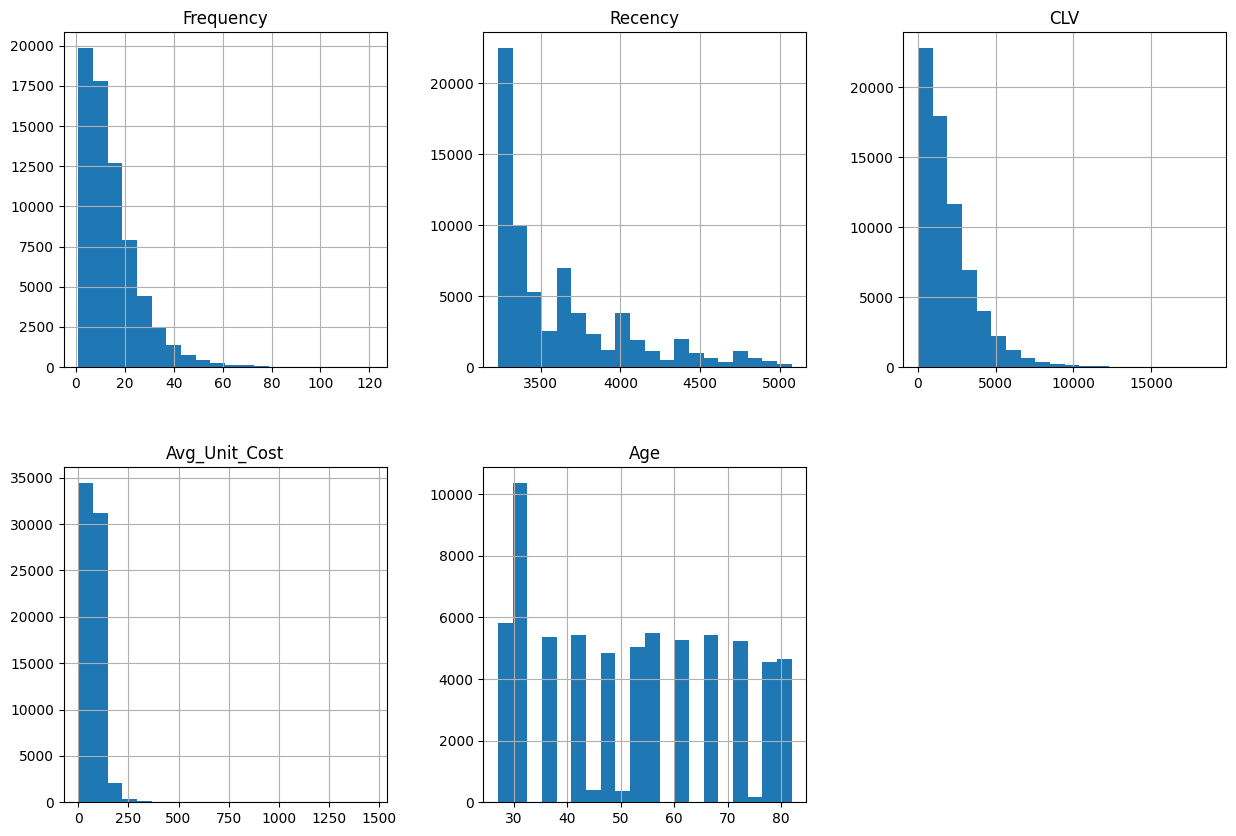

In [ ]:
#create individual histograms for each feature
df_aggr=df_aggregate.drop(columns=['Customer ID'])
df_aggr.hist(figsize=(15,10), layout=(2,3), bins=20)
plt.show()


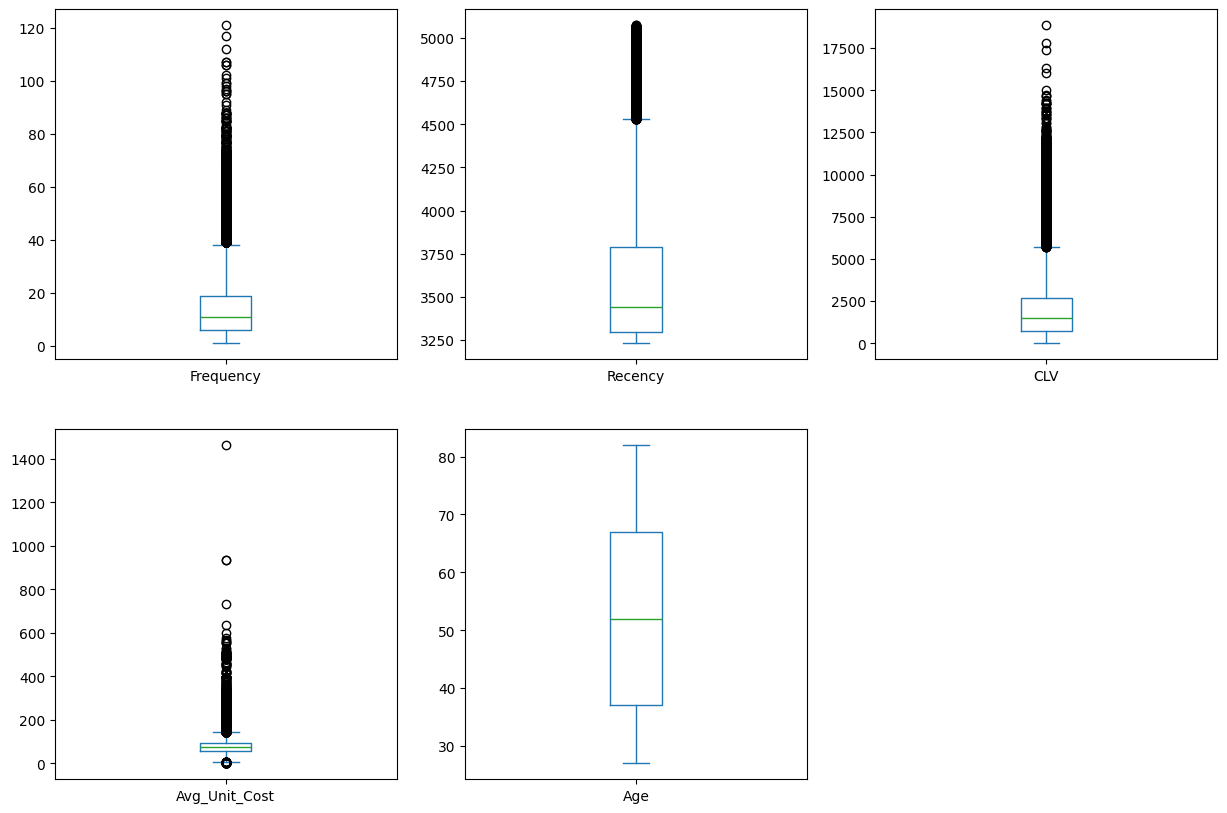

In [ ]:
#create individual box plots for the new features
df_aggr.plot(kind='box', subplots=True, layout=(2,3), figsize=(15,10))
plt.show()


Frequency and CLV distributions look very similar. Observations are more dense in smaller feature values however withlarge outliers for all features exccept Age. Age seems to be more evenly distibuted.

#Outlier detection via IQR
Let's have a closer look at the outliers via IQR method

In [ ]:
display(df_aggr.describe(percentiles=[0.25,0.5,0.75]))

IQR = df_aggr.quantile(0.75) - df_aggr.quantile(0.25)
IQR_upper_limit=df_aggr.quantile(0.75) + 1.5*IQR
IQR_lower_limit=df_aggr.quantile(0.25) - 1.5*IQR

print('IQR upper limit:\n' , IQR_upper_limit ,"\n\n")
print('IQR lower limit:\n', IQR_lower_limit,"\n\n")

IQR_upper=df_aggr > IQR_upper_limit
IQR_lower=df_aggr < IQR_lower_limit

print("number of higher outliers\n", IQR_upper.sum(), "\n\n")
print("number of lower outliers\n", IQR_lower.sum())

,Frequency,Recency,CLV,Avg_Unit_Cost,Age
count,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000
mean,13.933353,3614.399971,1950.148420,78.895675,52.032533
std,11.328807,414.289931,1719.916365,38.005259,17.486206
min,1.000000,3228.000000,0.630000,0.500000,27.000000
25%,6.000000,3292.000000,696.000000,57.579792,37.000000
50%,11.000000,3436.000000,1497.400000,73.450000,52.000000
75%,19.000000,3786.000000,2709.845000,92.515260,67.000000
max,121.000000,5072.000000,18860.960000,1463.500000,82.000000


IQR upper limit:
 Frequency          38.500000
Recency          4527.000000
CLV              5730.612500
Avg_Unit_Cost     144.918462
Age               112.000000
dtype: float64 


IQR lower limit:
 Frequency         -13.50000
Recency          2551.00000
CLV             -2324.76750
Avg_Unit_Cost       5.17659
Age                -8.00000
dtype: float64 


number of higher outliers
 Frequency        2654
Recency          3353
CLV              2590
Avg_Unit_Cost    2821
Age                 0
dtype: int64 


number of lower outliers
 Frequency         0
Recency           0
CLV               0
Avg_Unit_Cost    68
Age               0
dtype: int64


#One Class SVM to identify outliers

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

scaled_df=StandardScaler().fit_transform(df_aggr)
OneClassSVM_preds=OneClassSVM(kernel='rbf',gamma=0.1, nu=0.03).fit_predict(scaled_df)
(OneClassSVM_preds==-1).sum()

np.int64(2045)

One Class SVM produces around 2K observations , aligned to a nu of 3%. One can overlap these with the outliers from IQR to determine outliers for a further investigation.

# Create pipeline for data preprocessing & clustering

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

numerical_features = ['Frequency', 'Recency', 'CLV', 'Avg_Unit_Cost', 'Age']
#categorical_features = ['Customer ID']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# Create the pipeline
kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state=42, n_init=10)) # Added n_init to avoid warning
])

#Run Elbow method & calculate Silhouette score

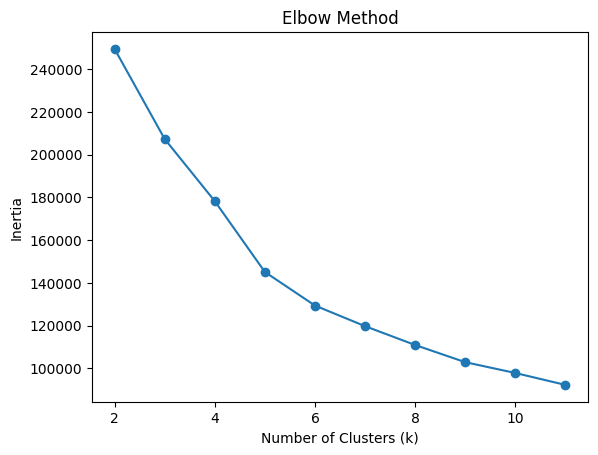

In [ ]:
k_values = range(2, 12)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
print ("silhouette_scores:" , silhouette_scores)
np.argmax(silhouette_scores)

silhouette_scores: [np.float64(0.2602684990288305), np.float64(0.23855979961851612), np.float64(0.2476438336033472), np.float64(0.26704155158937415), np.float64(0.2523478439914858), np.float64(0.2348969958083608), np.float64(0.23461859750352837), np.float64(0.2399724480597231), np.float64(0.2348911126981199), np.float64(0.22704225036086434)]


np.int64(3)

Elbow method suggests the inertia seems to reduce sharply until k=5, from there on the rate of decrease seems to slow down.

Maximum Silhouette score observed in the k_means [2,11] appears to be at k=5, which supports the observation from the Elbow method. However the scores are in a very similar range and far from a perfect score of 1.


#Run hierarchical clustering & dendogram

Due to limitation of available compute power, and avoid the notebook crashing, we take a smaller sample from the data frame to run the dendogram and analyze hierarchical clustering.

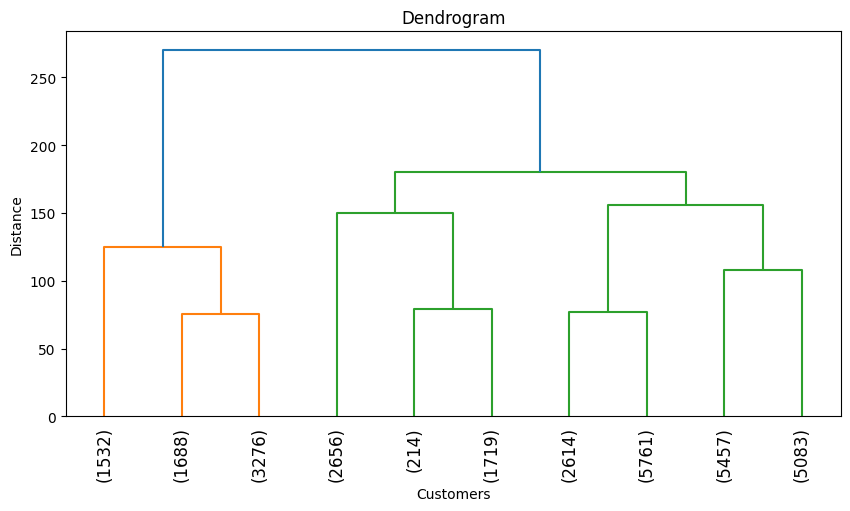

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

scaled_df = pd.DataFrame(scaled_df, columns=df_aggr.columns)
small_df = scaled_df.sample(n=30000).reset_index(drop = True)

plt.figure(figsize=(10, 5))
dendrogram(linkage(small_df, method='ward'), truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=12)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

From the dendogram, 2, 3 or 5 distinct clusters could be justified. Depending on how granular a segmentation is sought after.

The k=5 suggested by Elbow and Silhouette scores would keep the leaf (5555) as a seperate branch. Merging this leaf to the closest branch would otherwise require a large step up (around 140) in distance. This is relatively a granular number considering the small number of features avaliable.

On the other hand, if we were to accept a larger distance between clusters (circa 150), one could consider 3 as the number of clusters which essentially keep yellow, green and red clusters seperate. With a similar arguement, if we accept a distance at circa 170, green and red clsuters could be merged as well, resulting in 2 clusters. Smaller number of clusters could help interpretiblity and practicality of the segmentation.

Agglomerative Clustering is based on the same algorithm to create the dendogram, hence is very costly to run in the full data set. An example run on a smaller sample is as below neverthless.

In [ ]:
# An example clustering based on Agglomerative Clustering could be as below. This still uses the small data frame as the notebook crashes for the aggregated data set with ~68K rows.

aggloCluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward').fit(small_df)
aggloClustersPredict = aggloCluster.fit_predict(small_df)
aggloClustersPredict.shape
aggloClustersPredict

array([1, 1, 1, ..., 4, 0, 4])

k=5 still seems may be an appropriate choice, so let's continue analyzing for this.

#Analyze clusters for k means (k=5)

In [ ]:
pipeline_5 = kmeans_pipeline.set_params(kmeans__n_clusters=5)
pipeline_5.fit(df_aggr)
cluster_labels_5=pipeline_5.predict(df_aggr)

# add cluster labels to df_aggregate to show CustomerID vs Cluster mapping
df_aggregate['Cluster_k_5']=cluster_labels_5
df_aggregate.head()

feature_by_cluster=df_aggregate.groupby('Cluster_k_5').mean()
print(feature_by_cluster)

              Customer ID  Frequency      Recency          CLV  Avg_Unit_Cost  \
Cluster_k_5                                                                     
0            45800.369523  10.996427  3476.345705  1412.066294      71.073770   
1            45591.515025  12.557734  3479.567780  1648.573656      74.131613   
2            45274.160431  33.206396  3371.512293  4913.766266      82.866052   
3            44517.839108   5.376578  3825.560032  1570.798711     181.455936   
4            44980.657267   5.046025  4366.465340   610.979876      63.699551   

                   Age  Cluster_k_2  
Cluster_k_5                          
0            68.714286     0.855456  
1            36.968621     0.679133  
2            47.821664     0.000000  
3            53.450443     0.897932  
4            56.438932     0.999340  


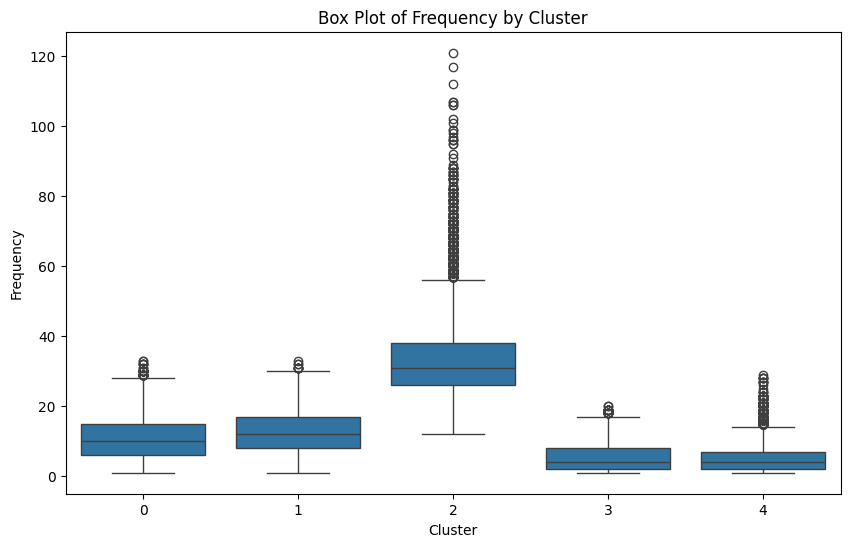

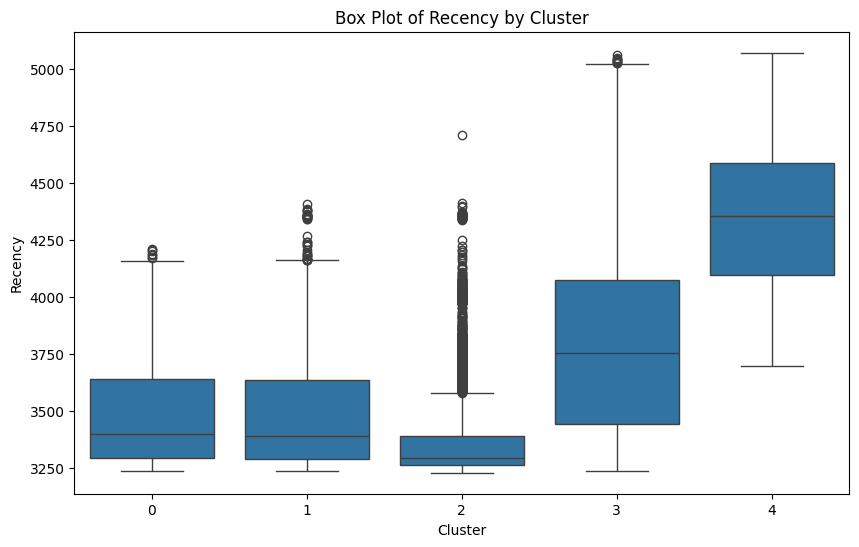

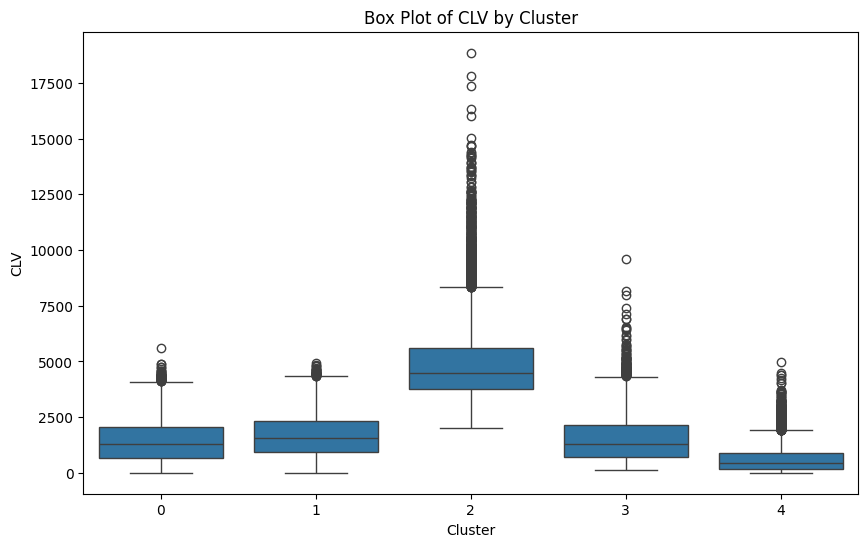

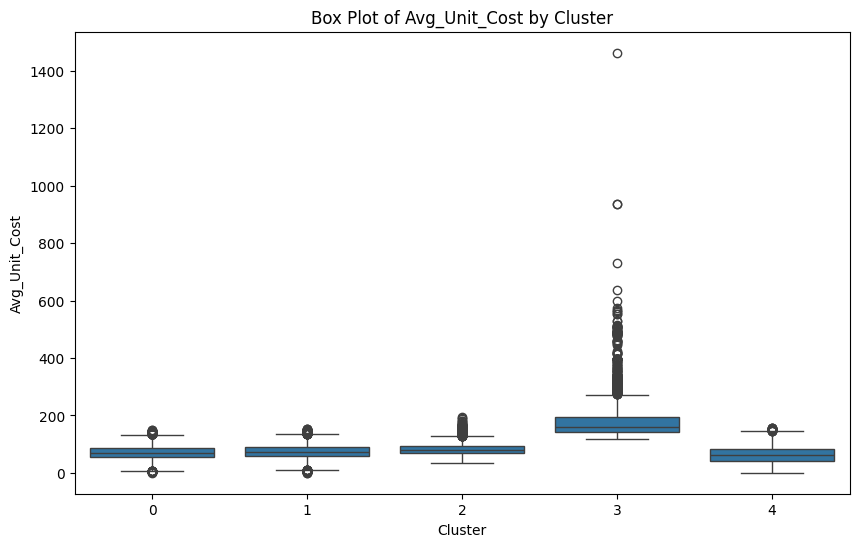

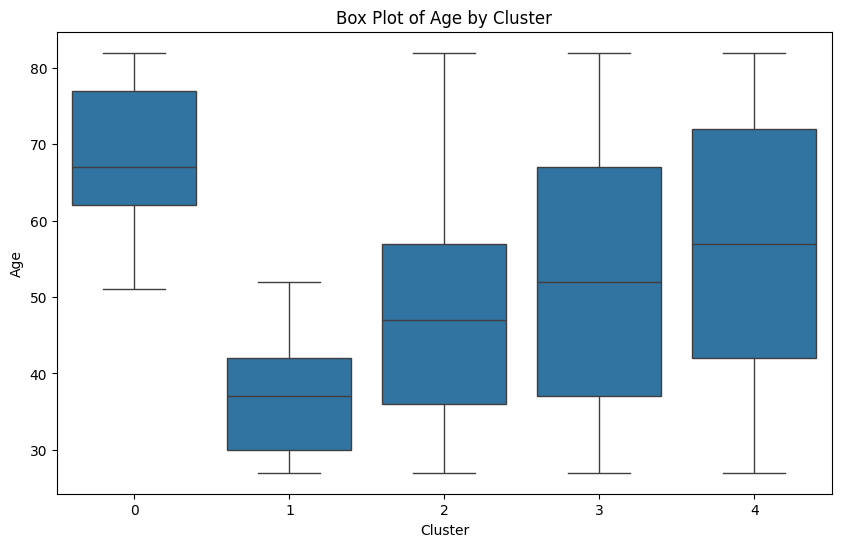

In [ ]:
# For each feature, create box plots, comparing the distributions in each cluster
for feature in df_aggr.columns:
    if feature != 'Cluster_k_5':
      plt.figure(figsize=(10, 6))
      sns.boxplot(x='Cluster_k_5', y=feature, data=df_aggregate)
      plt.title(f'Box Plot of {feature} by Cluster')
      plt.xlabel('Cluster')
      plt.ylabel(feature)
      plt.show()


# Observations about the clusters
From the box plots and mean statistics, the following observations can be made:
- Cluster 0: Older customers (mostly 60-75), moderate frequency, bringing moderate revenue, smaller individual purchases. They have been more recent purchasers
- Cluster 1: Younger customers (mostly 30-40)  moderate frequency, bringing moderate revenue, smaller individual purchases. They have been more recent purchasers. Quite similar characteristics to Cluster 0 except the age.
- Cluster 2: moderate-high age (mostly 40-70) low frequency, bringing low revenue, smaller individual purchases. They have been more purchasers further back, and potentially not purchasing again. It may be worth researching why they stopped buying and plan campaigns to win them back / learn from them to retain other customer segments.
- Cluster 3: moderate age group (mostly 35-55)  high frequency, bringing high revenue, moderate-high individual purchases. They have been most recent purchasers. This is a prime segment which brings a lot of value to the company , which must be kept satisfied for ongoing value to business.
- Cluster 4:moderate-high age (mostly 35-65) low frequency, bringing moderate revenue, highest individual purchases. Recency of these customers is moderate. Somewhat similar to cluster 2, however more recent purchasers buying more expensive items and bringing more value to business. Should try to avoid losing them (like cluster 2). Consider adding deals on their favourite items to keep them coming back.

# Scatterplot of PCA components for each cluster

In order to achieve this, we need to reduce the dimensions of the data to 2 via a PCA approach.

explained variance: [0.44528052 0.20726301]


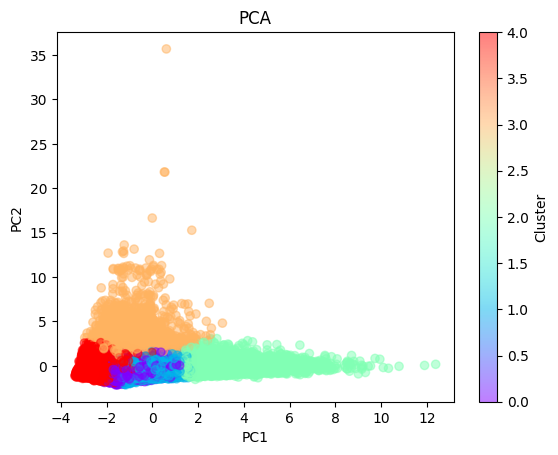

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_pca=PCA(n_components=2).fit_transform(scaled_df)

#calculate explained variance from the PCA
print("explained variance:", PCA(n_components=2).fit(scaled_df).explained_variance_ratio_)

plt.scatter(df_pca[:,0], df_pca[:,1], c=cluster_labels_5, cmap='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar(label='Cluster')
plt.show()


The visualisation of the clusters via PCA shows 5 potentially distinct cluster however the seperation between clusters is not very clear, particularly between Cluster 0 and Cluster 1. This may be due to the fact that we cover only 65% of the variance in the data with the first 2 princial components depicted. Other than that it is possible the relationship between features may not be linear, hence a PCA approximation may not be appropriate in the first place.

# Implement t-SNE for data visualisation

Let's pick 2 components for t-SNE to allow visualisation. We will use a perplexity of 5 to begin with for a quicker calculation. Even though this will initially focus on more local structures in data.

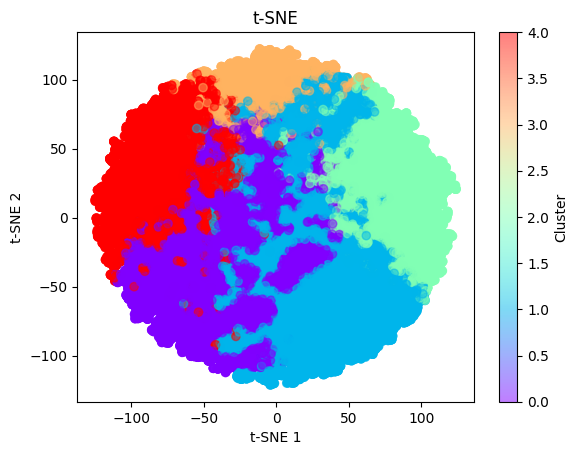

In [ ]:
transformedData=TSNE(n_components=2, perplexity=5).fit_transform(scaled_df)
plt.scatter(transformedData[:,0], transformedData[:,1], c=cluster_labels_5, cmap='rainbow', alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(label='Cluster')
plt.show()


Based on the original t-SNE visualisation, the seperation between clusters were not clear. This may be due to the low perplexity value, which considers only the closest 5 data points to calclate the clusters. Furthermore, the calculation was heavy and took ~20 minutes.

Let's try a larger perplexity number, say 20. However this will further increase the compute time (to approximately 4 times longer). Hence to repeat the experiment, lets pick a sample of 10,000 from df_aggregate (which has the corresponding Cluster labels on it. Note using a PCA before t-SNE would provide limited help as the dimensionality is not very high (only 5 features). The real bottleneck in computational time is the large number of observations.

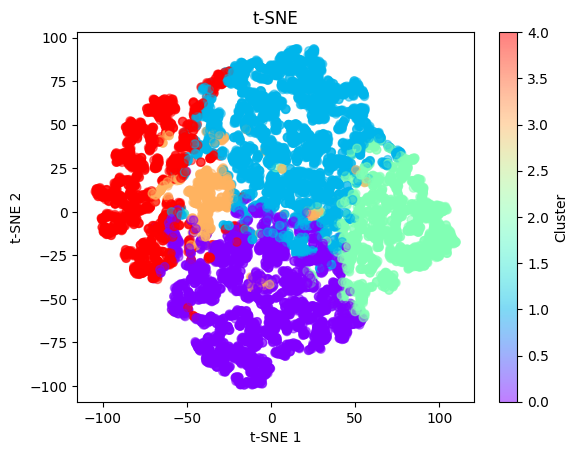

In [ ]:

subset_df_10K = df_aggregate.sample(n=10000, random_state=42).reset_index(drop = True)
subset_cluster_series_10K=subset_df_10K['Cluster_k_5']
df_scaled_subset_10K=StandardScaler().fit_transform(subset_df_10K.drop(columns=['Customer ID','Cluster_k_5', 'Cluster_k_2']))
transformedData_subset=TSNE(n_components=2, perplexity=20).fit_transform(df_scaled_subset_10K)
plt.scatter(transformedData_subset[:,0], transformedData_subset[:,1], c=subset_cluster_series_10K, cmap='rainbow', alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(label='Cluster')
plt.show()


Perplexity = 20 aims to capture the global structure in data better - in this case provided a clearer seperation between 5 clusters, compared to a lower perplexity. There is still some overlap between clsuters, i.e. 0 and 1, however the core of the segments are much clearer.

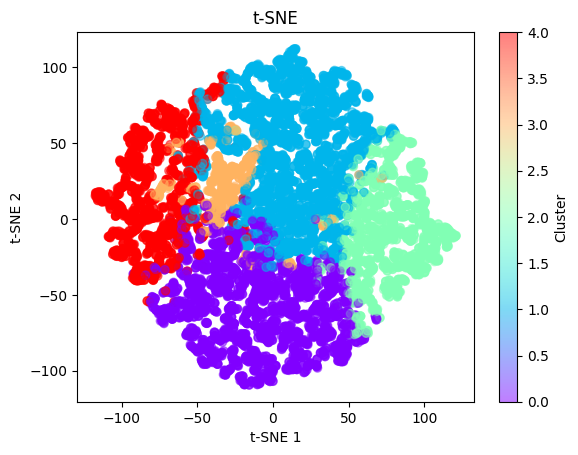

In [ ]:
transformedData_subset=TSNE(n_components=2, perplexity=10).fit_transform(df_scaled_subset_10K)
plt.scatter(transformedData_subset[:,0], transformedData_subset[:,1], c=subset_cluster_series_10K, cmap='rainbow', alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(label='Cluster')
plt.show()

Given the overlap on the clusters on t-SNE and PCA, it may make sense to consider a smaller k for clustering, given the existing features may not lend themselves for segregating the data into 5 clusters. Silhouette score of k=2 is the second best after k=5. Also the dendogram suggest k=2 may be an appropriate choice for clustering.

## Analysis of k=2

There is an arguement to split the customers into smaller number of segments, i.e. 2 based on Silhouette scores

In [ ]:
pipeline_2 = kmeans_pipeline.set_params(kmeans__n_clusters=2)
pipeline_2.fit(df_aggr)
cluster_labels_2=pipeline_2.predict(df_aggr)

# add cluster labels to df_aggregate to show CustomerID vs Cluster mapping
df_aggregate['Cluster_k_2']=cluster_labels_2
df_aggregate.head()

feature_by_cluster_2=df_aggregate.groupby('Cluster_k_2').mean()
print(feature_by_cluster_2)

             Frequency      Recency          CLV  Avg_Unit_Cost        Age
Cluster_k_2                                                               
0            26.387812  3378.511113  3855.646088      82.720876  46.573981
1             8.103925  3729.214169  1058.262142      77.105253  54.599218


explained variance: [0.44527833 0.207263  ]


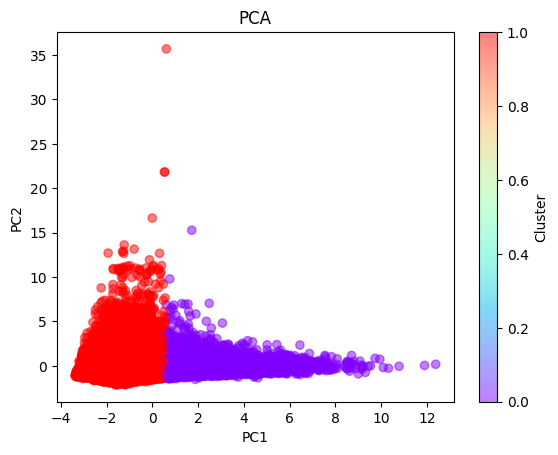

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_pca=PCA(n_components=2).fit_transform(scaled_df)

#calculate explained variance from the PCA
print("explained variance:", PCA(n_components=2).fit(scaled_df).explained_variance_ratio_)

plt.scatter(df_pca[:,0], df_pca[:,1], c=cluster_labels_2, cmap='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar(label='Cluster')
plt.show()


PCE shows a much clearer seperation.

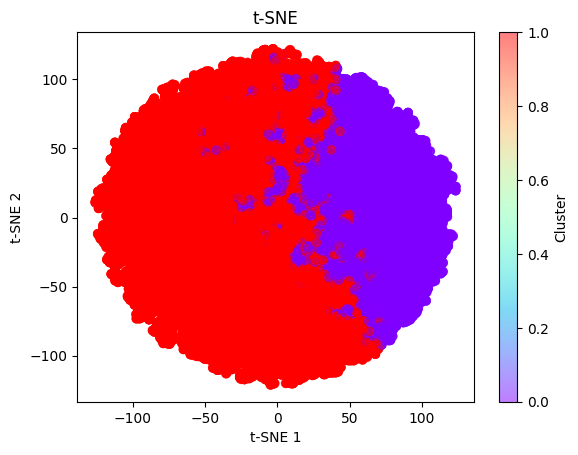

In [ ]:
transformedData=TSNE(n_components=2, perplexity=5).fit_transform(scaled_df)
plt.scatter(transformedData[:,0], transformedData[:,1], c=cluster_labels_2, cmap='rainbow', alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(label='Cluster')
plt.show()

There is still some overlap with t-SNE (perplexity=5)

In [ ]:
df_aggregate.head()

,Customer ID,Frequency,Recency,CLV,Avg_Unit_Cost,Age,Cluster_k_2,Cluster_k_5
0,1,35.0,3268,4322.70,89.622857,72.0,0,2
1,3,20.0,3370,2821.00,90.505000,42.0,0,1
2,4,9.0,4359,782.67,37.195556,42.0,1,4
3,5,19.0,3256,2810.98,107.947368,37.0,0,1
4,6,15.0,3441,1604.58,52.526667,66.0,1,0


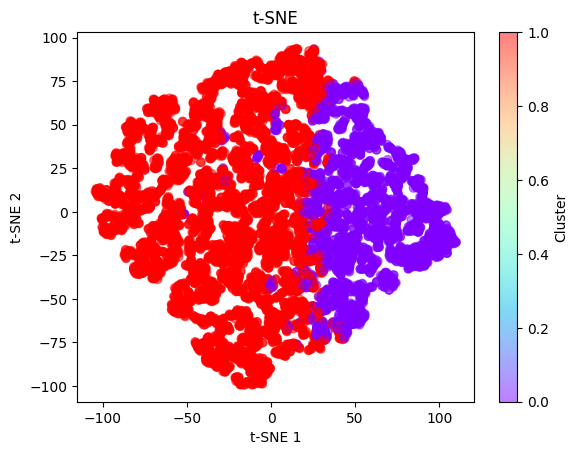

In [ ]:

subset_df_10K_2 = df_aggregate.sample(n=10000, random_state=42).reset_index(drop = True)
subset_cluster_series_10K_2=subset_df_10K['Cluster_k_2']
df_scaled_subset_10K_2=StandardScaler().fit_transform(subset_df_10K_2.drop(columns=['Customer ID','Cluster_k_2', 'Cluster_k_5']))
transformedData_subset_2=TSNE(n_components=2, perplexity=20).fit_transform(df_scaled_subset_10K_2)
plt.scatter(transformedData_subset_2[:,0], transformedData_subset_2[:,1], c=subset_cluster_series_10K_2, cmap='rainbow', alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(label='Cluster')
plt.show()


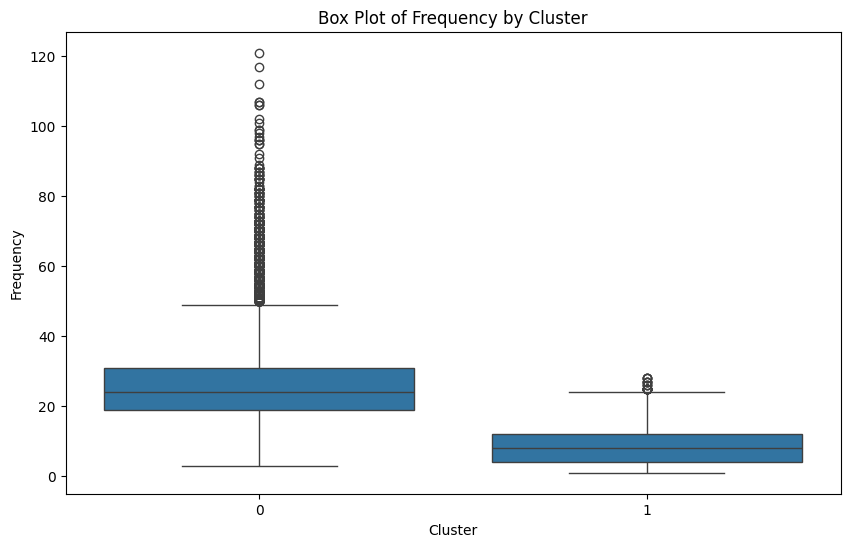

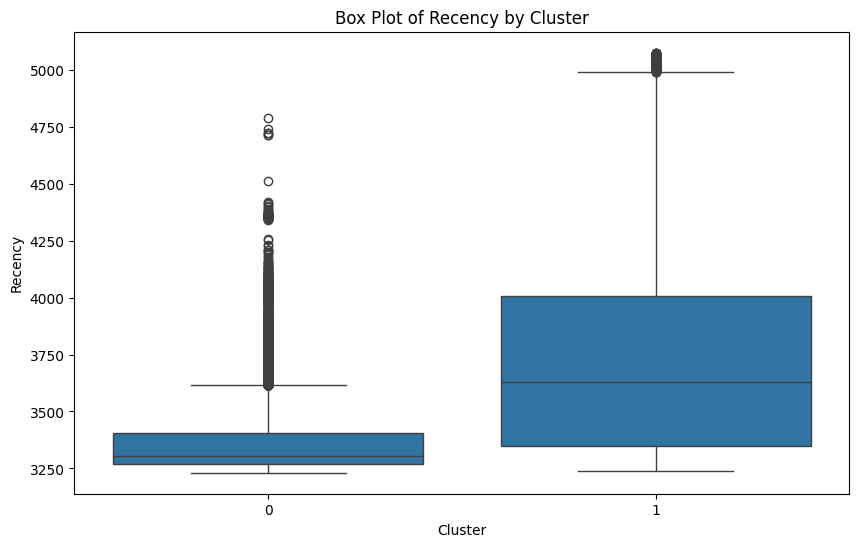

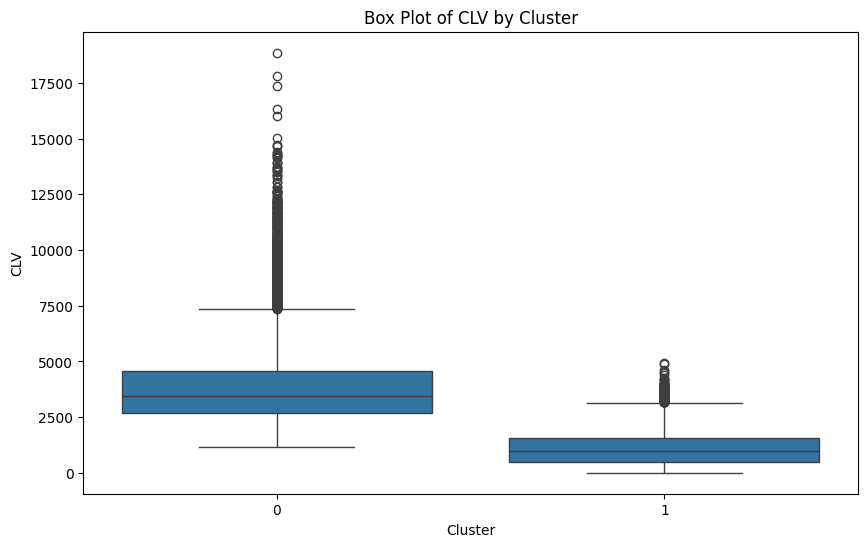

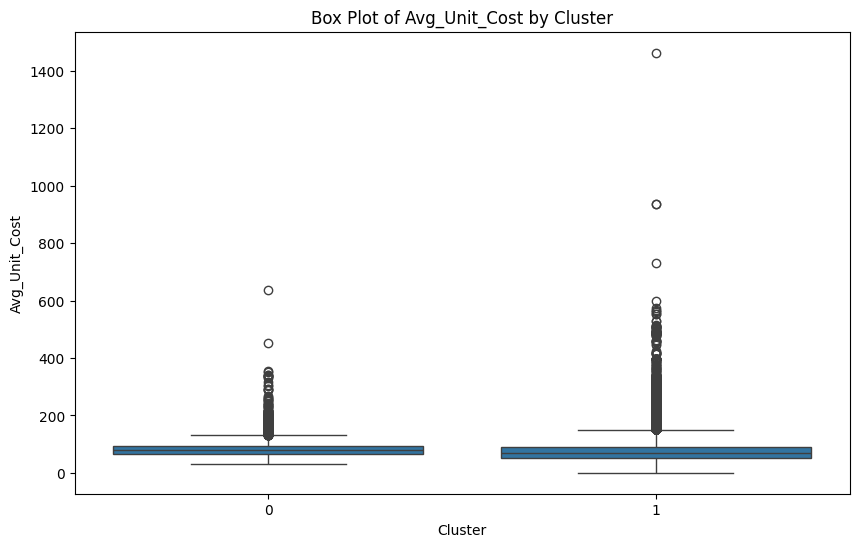

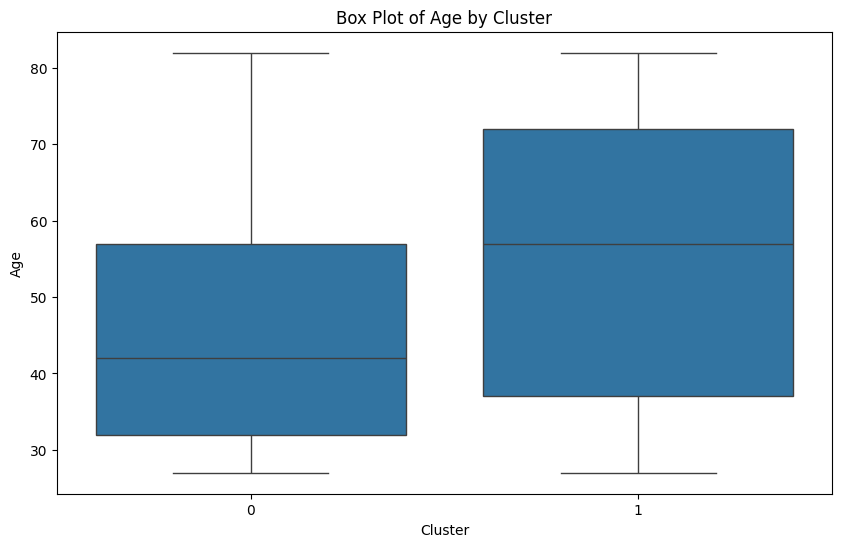

In [ ]:
# For each feature, create box plots, comparing the distributions in each cluster
for feature in df_aggregate.columns:
    if feature != 'Cluster_k_5'and feature != 'Cluster_k_2'and feature != 'Customer ID':
      plt.figure(figsize=(10, 6))
      sns.boxplot(x='Cluster_k_2', y=feature, data=df_aggregate)
      plt.title(f'Box Plot of {feature} by Cluster')
      plt.xlabel('Cluster')
      plt.ylabel(feature)
      plt.show()

Based on k=2:

Cluster 0:  recent, high value customers, frequently spending. Relatively younger

Cluster 1:  lapsed customers , less value , less frequently shopping. They are older customers, buying higher ticket items.

2 could be an appropriate choice to segment the customers, however this may be too simplistic for a marketing campaign to be devised to different customer segments.

### Reference:
SAS, 2024. CUSTOMERS_CLEAN [Data set]. SAS. Last revised on 15 December 2021. [Accessed 20 February 2024].